# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

### Import all required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kb
import datetime

### Read the data from file

In [2]:
# Read the data from xlsx file and return the data in a dataframe

# Input: filename
filename = "Online Retail.xlsx"


# Output: dataframe
def read_xlsx(filename):
    df = pd.read_excel(filename)
    return df


# Read the data from csv file and return the data in a dataframe
df = read_xlsx(filename)


### Data Understanding

In [3]:
print(" \n Data Dimensions:")
df.shape  # Returns the dimensions (rows and columns) of our data


 
 Data Dimensions:


(541909, 8)

We have 541909 rows and 8 columns in the dataset. Wow! That's a lot of data to work with. Let's see what we can do with it.

#### Dataset Information

In [4]:
# Display information about data types and missing values
print(" \n Dataset Information: \n")
df.info()


 
 Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


So we have following columns in the dataset: <br />
**InvoiceNo**: A 6-digit integral number uniquely assigned to every transaction, if it starts with a '**C**' it indicates a cancellation. <br /> 
**StockCode**: A 5-digit integral number uniquely assigned to each product. <br />
**Description**: Product name <br />
**Quantity**: Quantity of product per transaction. <br />
**InvoiceDate**: Date and time the day and time that each transaction occurred. <br />
**UnitPrice**: Product price per unit. <br />
**CustomerID**: A 5-digit integral number uniquely assigned to each customer. <br />
**Country**: Name of the country where each customer resides. <br />

In [5]:
# Displays all the columns of the dataframe
column_names = df.columns.tolist()
print(" \n Column Names: \n", column_names)


 
 Column Names: 
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [6]:
# Display first 5 rows of the dataframe.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# Display last 5 rows of the dataframe.
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


As the data types of the columns are looking good, we can move on to the next step.

In [8]:
# Generate summary statistics without 'InvoiceDate' column
print("\nSummary Stats:\n")
summary_stats = df[["Quantity", "UnitPrice", "CustomerID"]].describe()
print(summary_stats)



Summary Stats:

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [9]:
# # #  Check if our dataset contains any -ve values

# # Select the columns for checking negative values
# columns_to_check = ['Quantity', 'UnitPrice', 'CustomerID']

# # Check for negative values in the selected columns
# has_negative_values = (df[columns_to_check] < 0).any().any()

# if has_negative_values:
#     print("The dataset contains negative values in the selected columns.")
# else:
#     print("The dataset does not contain negative values in the selected columns.")


As we can observe, there are some -ve values in the Quantity and UnitPrice columns. Let's see if due to the "Cancelled" oders, we are getting these -ve values.

In [10]:
# Let's check why we are getting negative values in the Quantity and UnitPrice columns
# Let's check if we have cancelled orders in our dataset
cancelled_orders = df[df["InvoiceNo"].astype(str).str.contains("C")]
cancelled_orders.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [11]:
# Search for transaction with quantity == -80995
cancelled_orders[cancelled_orders["Quantity"] == -80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


Okay so our assumption was correct. The -ve values in the Quantity column are the returns made by the customers. Now in order to proceed further, we first need to find a way to handle these -ve values. So now let's check the total number and percentage of -ve values.

##### Number of Cancelled Orders

In [12]:
# Check the number of cancelled orders
cancelled_orders_count = len(cancelled_orders)
print("We have", cancelled_orders_count, "cancelled orders.")

# Calculate the percentage of cancellations
total_orders = df["InvoiceNo"].nunique()
percentage_cancelled = (cancelled_orders_count / total_orders) * 100
print("Percentage of orders canceled: {:.2f}%".format(percentage_cancelled))


We have 9288 cancelled orders.
Percentage of orders canceled: 35.86%


The percentage of cancelled orders are high. We can study cancelled orders separately to find out the reasons for cancellation and then we can take appropriate actions to reduce the number of cancellations. 

In [13]:
# Check for Null values in dataframe
print(" \n Null Values: \n")
print(df.isnull().sum())

missing_percentage = (df.isnull().sum() / len(df)) * 100

print(" \n Null Values Percentage: \n")
print(missing_percentage)

# Visualize Null values using Klib Library
# kb.missingval_plot(df)

 
 Null Values: 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
 
 Null Values Percentage: 

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


As we can see that there are many missing values in the CustomerID column. We need to remove them for further analysis. We can also remove the rows with missing values in the Description column.

In [14]:
# Drop all the rows with Null values
df = df.dropna()


Dropping duplicates from the dataset.

In [15]:
# Let's check for duplicate rows in the dataset and remove them, if any.
duplicate_rows = df[df.duplicated()]
print(" \n Number of duplicate rows: ", duplicate_rows.shape)

# Drop the duplicate rows
df = df.drop_duplicates()

 
 Number of duplicate rows:  (5225, 8)


Now as we have done all the data cleaning and pre-processing part, let's now move on to Exploratory Data Analysis.

## Let's have some fun with the data

#### Let's see top 10 customers who have placed the most number of orders.

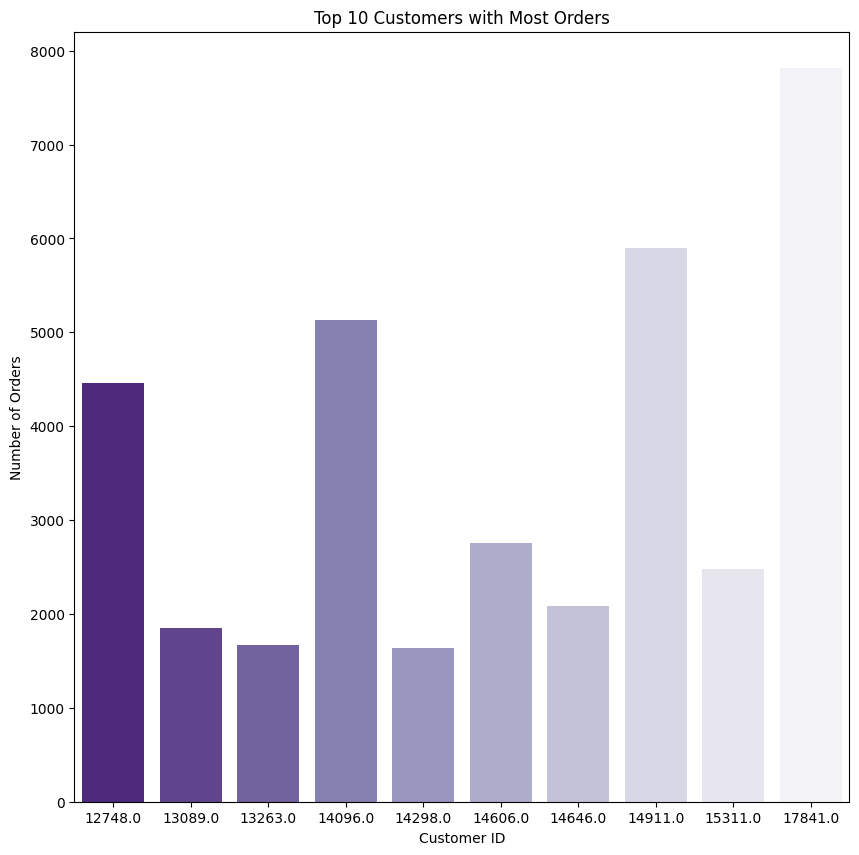

In [21]:
# Grouping by customer ID and counting the number of orders
customer_groupby = df.groupby("CustomerID")["InvoiceNo"].count()

# Let's see top 10 customers who have placed the most number of orders.
top_customers = customer_groupby.sort_values(ascending=False).head(10)

# Rest of your code for visualization
plt.figure(figsize=(10, 10))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="Purples_r")
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.title("Top 10 Customers with Most Orders")
plt.show()

So, Customer with CustomerID 14911 has placed the most number of orders with around ~250 orders.  

#### Let's see top 10 customers who have placed the least number of orders.

In [28]:
#  As we can see, there are many customers who have placed only one order. So a bar plot might not be the best way to visualize this data. Let's show the data as dataframe instead.
#  Show the top 10 customers with the least number of orders
top_customers_least_orders = customer_groupby.sort_values(
    ascending=True).head(10)
top_customers_least_orders

CustomerID
17752.0    1
13270.0    1
15668.0    1
18113.0    1
15657.0    1
13256.0    1
16765.0    1
13185.0    1
15590.0    1
18141.0    1
Name: InvoiceNo, dtype: int64

#### What is the Top Selling Product?

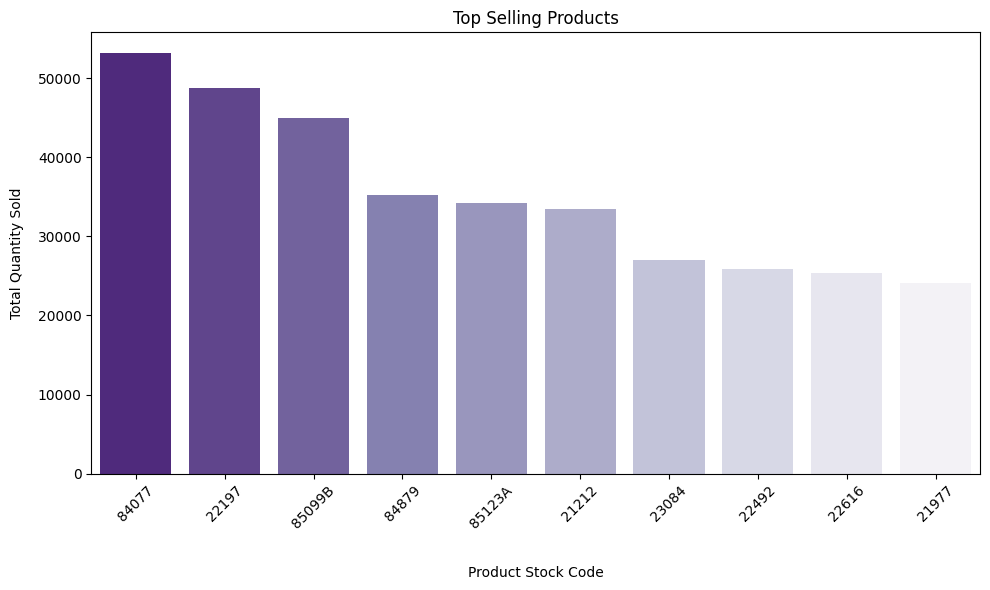

In [29]:
# Group the data by "StockCode" and calculate total quantity sold
product_groupby = df.groupby("StockCode")["Quantity"].sum().reset_index()

# Find the top-selling products based on total quantity sold
top_products = product_groupby.groupby(
    "StockCode")["Quantity"].sum().nlargest(10)

# Visualize the top-selling products
plt.figure(figsize=(10, 6))

# Subplot for top-selling products
plt.subplot(1, 1, 1)
ax = sns.barplot(x=top_products.index,
                 y=top_products.values, palette="Purples_r")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center")
plt.title("Top Selling Products")
plt.xlabel("Product Stock Code", labelpad=25)  # Adding padding to x-axis label
# Adding padding to y-axis label
plt.ylabel("Total Quantity Sold", labelpad=10)

plt.tight_layout()  # Adjust layout for better visualization
plt.show()

As observed in the visualisation, the most popular product is Product Stock Code *84077*. Let's have a look at the product description.

In [30]:
# Get the description of the top-selling product
top_product_description = df[df["StockCode"] == 84077]["Description"].unique()
print("Name of the top-selling product: ", top_product_description)


Name of the top-selling product:  ['WORLD WAR 2 GLIDERS ASSTD DESIGNS']


#### Let's see country wise distribution of orders.

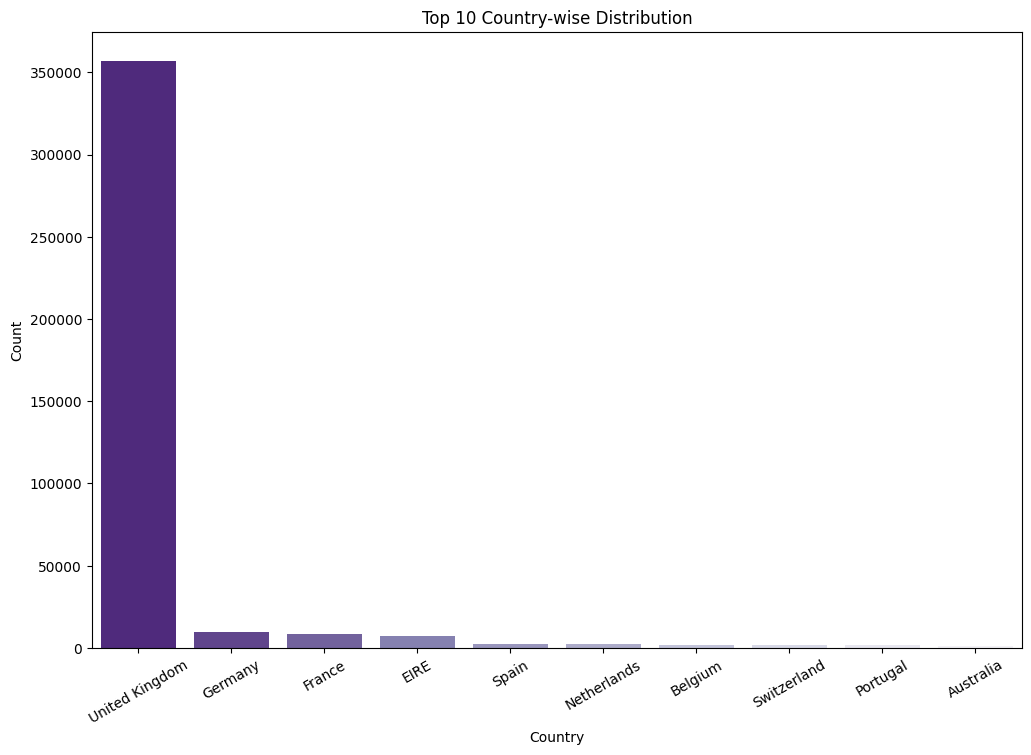

In [31]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Calculate the counts of each country in the 'Country' column and select the top 10
country_counts = df["Country"].value_counts()[:10]

# Create a bar plot using Seaborn
sns.barplot(x=country_counts.index,
            y=country_counts.values, palette="Purples_r")
# print(country_counts.index, country_counts.values)

# Customize plot labels and title
plt.title("Top 10 Country-wise Distribution")
plt.xlabel("Country")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha="center")

# Display the plot
plt.show()

So we can see that most of the orders are from United Kingdom ~ >350000 orders followed by Germany ~ >9000 orders and France ~ >8000 orders. On the other side, we have countries like Switzerland , Portugal and Australia with less than 2000 orders.

#### Top Selling Product in Each Country

In [32]:
# Group the data by "Country", "StockCode" and calculate total quantity sold
country_product_groupby = df.groupby(["Country", "StockCode"])[
    "Quantity"].sum()

# Find the top-selling product in each country
top_product_per_country = country_product_groupby.groupby("Country").idxmax()
# Maximum quantity sold for each country using .idxmax(). This will return the index of the row with the maximum value.
top_product_per_country_data = country_product_groupby.loc[top_product_per_country]
# Extract the corresponding data using .loc[] method. This will return the data corresponding to the index values.


# Display the top-selling product in each country in descending order
top_product_per_country_descending = top_product_per_country_data.sort_values(
    ascending=False
)

print(top_product_per_country_descending.reset_index())

                 Country StockCode  Quantity
0         United Kingdom     84077     47886
1            Netherlands     23084      4801
2                 France     23084      3999
3                  Japan     23084      3401
4                 Sweden     22492      2916
5              Australia     22492      2916
6                   EIRE     22197      1785
7                Germany     22326      1206
8                  Spain    84997D      1089
9            Switzerland     22554       636
10                Norway     16008       576
11               Finland    84997D       552
12                Canada     37370       504
13               Belgium     21212       480
14       Channel Islands     21785       407
15                Cyprus     22335       384
16             Singapore     22339       384
17               Denmark     21915       288
18               Austria     21918       288
19              Portugal     22740       240
20                 Italy    51014A       240
21        

So it is pretty much clear that, "United Kingdom" is the top selling country, with the top selling product being StockCode 84077, having quantities sold of 47886. Let's see the description of this product.

In [33]:
# Filter the data for the United Kingdom
uk_data = df[df["Country"] == "United Kingdom"]

# Find the most selling StockCode
most_selling_stockcode = uk_data["StockCode"].value_counts().idxmax()

# Get the description for the most selling StockCode
most_selling_description = uk_data.loc[
    uk_data["StockCode"] == most_selling_stockcode, "Description"
].iloc[0]

# Display the information
print("Name of the most selling product in the United Kingdom:")
print(most_selling_description)


Name of the most selling product in the United Kingdom:
WHITE HANGING HEART T-LIGHT HOLDER


So, **White Hanging Heart T-Light Holder** is the top selling product in the United Kingdom.

#### Let's look at the distribution of productsNumber

In [34]:
# Calculate Transaction Counts
# Group the DataFrame 'sales_data' by 'InvoiceNumber' and 'CustomerID', and calculate the count of each transaction.
transaction_counts = df.groupby(["InvoiceNo", "CustomerID"], as_index=False)[
    "InvoiceDate"
].count()

# Rename the column 'InvoiceDate' to 'Number of Products' for better clarity.
transaction_counts = transaction_counts.rename(
    columns={"InvoiceDate": "Number of Products"}
)

# Display the first few rows of the 'transaction_counts' DataFrame to show the calculated transaction counts.
transaction_counts.head()

,InvoiceNo,CustomerID,Number of Products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [35]:
transaction_counts.describe()

,CustomerID,Number of Products
count,22190.000000,22190.000000
mean,15238.498738,18.098423
std,1733.149624,23.363888
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


Most people buy less than 25 products, to be specific ~24 products.

Average number of products per order: 17.88
Median number of products per order: 12.00
Mode number of products per order: 1.00


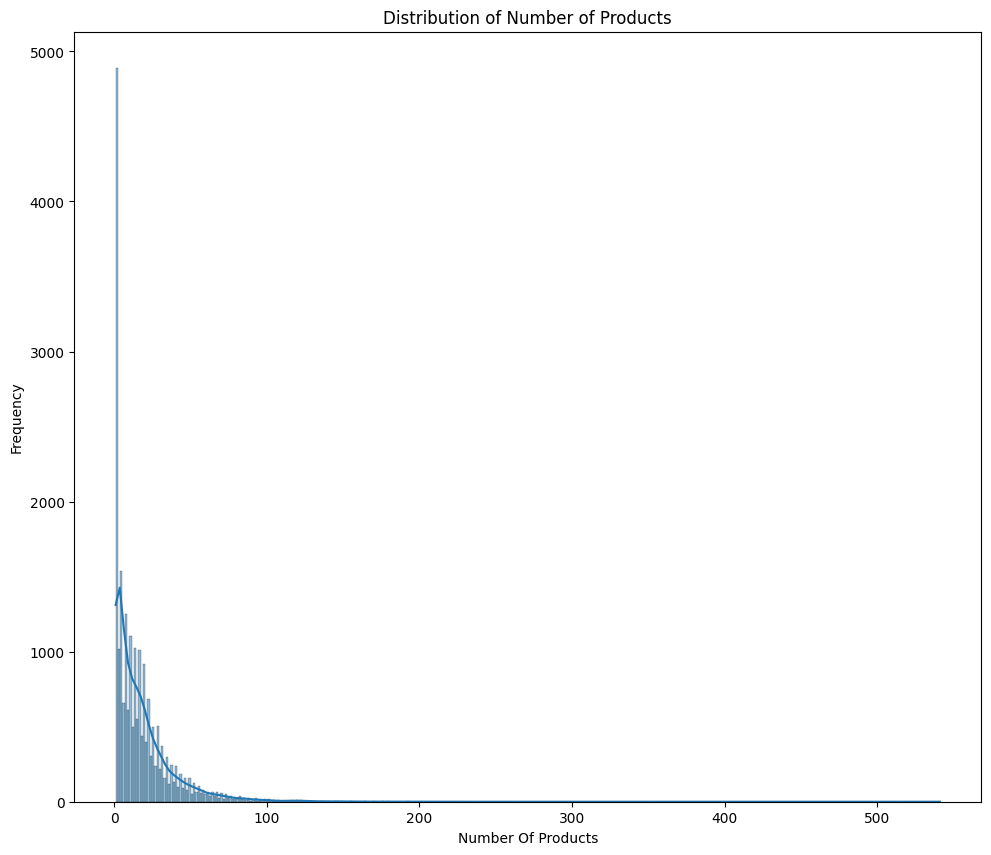

In [36]:
# Group the DataFrame 'df' by 'InvoiceNo' and count the number of unique 'StockCode' values for each invoice.
invoice_groupby = pd.DataFrame(df.groupby("InvoiceNo")["StockCode"].nunique())

# Rename the column to 'Number Of Products'
invoice_groupby.columns = ["Number Of Products"]

# Display the first few rows of the grouped DataFrame
invoice_groupby.head()

# Calculate the average number of products per order
avg_products_per_order = invoice_groupby["Number Of Products"].mean()
print("Average number of products per order: {:.2f}".format(
    avg_products_per_order))

# Calculate the median number of products per order
median_products_per_order = invoice_groupby["Number Of Products"].median()
print("Median number of products per order: {:.2f}".format(
    median_products_per_order))

# Calculate the mode number of products per order
mode_products_per_order = invoice_groupby["Number Of Products"].mode()
print("Mode number of products per order: {:.2f}".format(
    mode_products_per_order[0]))

# Visualize the distribution of product numbers using a histogram
plt.figure(figsize=(11.7, 10))
sns.histplot(data=invoice_groupby, x="Number Of Products", kde=True)
plt.title("Distribution of Number of Products")
plt.xlabel("Number Of Products")
plt.ylabel("Frequency")
plt.show()

There is a right-skewed distribution of products. Mostle number of products are less than 100. 

#### Let's have a look at monthly sales trend. 

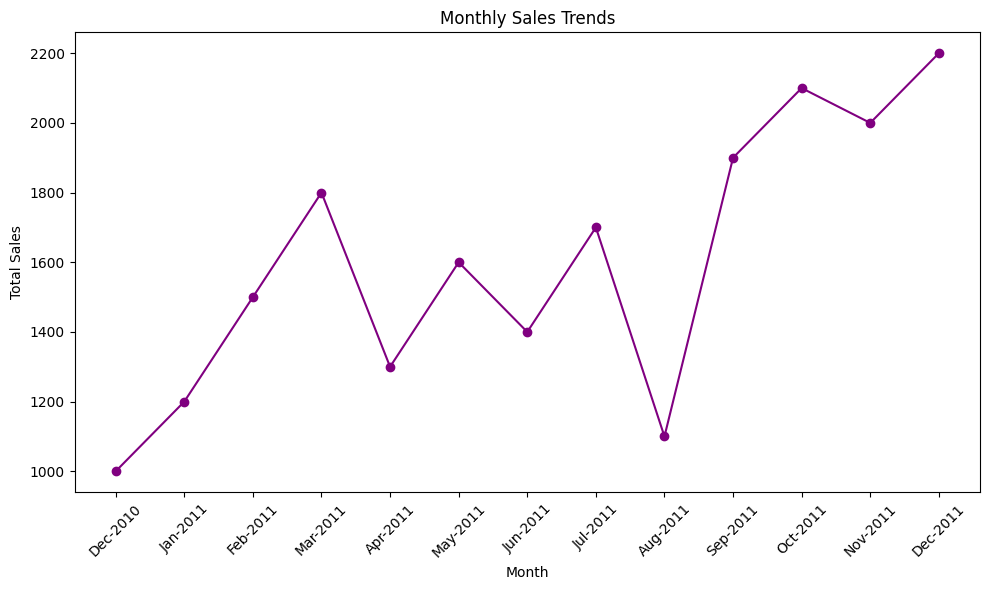

In [43]:
# Define the data for monthly sales
data = {
    "Dec-2010": 1000,
    "Jan-2011": 1200,
    "Feb-2011": 1500,
    "Mar-2011": 1800,
    "Apr-2011": 1300,
    "May-2011": 1600,
    "Jun-2011": 1400,
    "Jul-2011": 1700,
    "Aug-2011": 1100,
    "Sep-2011": 1900,
    "Oct-2011": 2100,
    "Nov-2011": 2000,
    "Dec-2011": 2200,
}

# Convert data into a DataFrame or Series
monthly_sales = pd.Series(data, name="Total Sales")

# Convert Period objects to strings for plotting
monthly_sales.index = monthly_sales.index.astype(str)

# Set the x-axis labels to month names in the desired order
month_names_ordered = [
    "Dec-2010",
    "Jan-2011",
    "Feb-2011",
    "Mar-2011",
    "Apr-2011",
    "May-2011",
    "Jun-2011",
    "Jul-2011",
    "Aug-2011",
    "Sep-2011",
    "Oct-2011",
    "Nov-2011",
    "Dec-2011",
]

# Create line chart for monthly sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o", color="purple")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trends")
plt.xticks(monthly_sales.index, month_names_ordered, rotation=45)
plt.tight_layout()
plt.show()


As we can see that the sales are highest in the month of November and lowest in the month of December. Also we can observe that there are huge difference in December 2010 and December 2011 sales. That's quite surprising. We can analyze this further to find out the reason behind this.

In [44]:
# # Let's see how many outliers we have in our dataset.
# print("\n Outliers Detection: \n")
# for col in df.columns:
#     if col in ["Quantity", "UnitPrice"]:
#         plt.figure(figsize=(8, 6))
#         sns.boxplot(df[col])
#         plt.title(f"Boxplot of {col}")
#         plt.show()

#### Customer Segmentation

In [45]:
# Lets calculate average invoice number for each customer
avg_invoice = df.groupby("CustomerID")["InvoiceNo"].nunique().mean()
print("Average Invoice Number: {:.2f}".format(avg_invoice))


Average Invoice Number: 5.08


In [66]:
# Customer segmentation based on purchase frequency and total spending
customer_segmentation = df.groupby("CustomerID").agg(
    {
        "InvoiceNo": "nunique",  # Count of unique invoices as purchase frequency
        "Quantity": "sum",  # Sum of total quantities
        "UnitPrice": "mean",  # Average unit price
    }
)

# Calculate TotalSales as the product of Quantity and UnitPrice
customer_segmentation["TotalSales"] = (
    customer_segmentation["Quantity"] * customer_segmentation["UnitPrice"]
)

# Define segmentation criteria


def segment_customers(row):
    if row["InvoiceNo"] >= 5 and row["TotalSales"] >= 500:
        return "High Value"
    elif row["InvoiceNo"] >= 3 and row["TotalSales"] >= 200:
        return "Medium Value"
    else:
        return "Low Value"


# Apply segmentation criteria
customer_segmentation["Segment"] = customer_segmentation.apply(
    segment_customers, axis=1
)
customer_segmentation


,InvoiceNo,Quantity,UnitPrice,TotalSales,Segment
CustomerID,,,,,
12346.0,2,0,1.040000,0.000000,Low Value
12347.0,7,2458,2.644011,6498.979011,High Value
12348.0,4,2341,5.764839,13495.487419,Medium Value
12349.0,1,631,8.289041,5230.384932,Low Value
12350.0,1,197,3.841176,756.711765,Low Value
...,...,...,...,...,...
18280.0,1,45,4.765000,214.425000,Low Value
18281.0,1,54,5.622857,303.634286,Low Value
18282.0,3,98,4.821538,472.510769,Medium Value


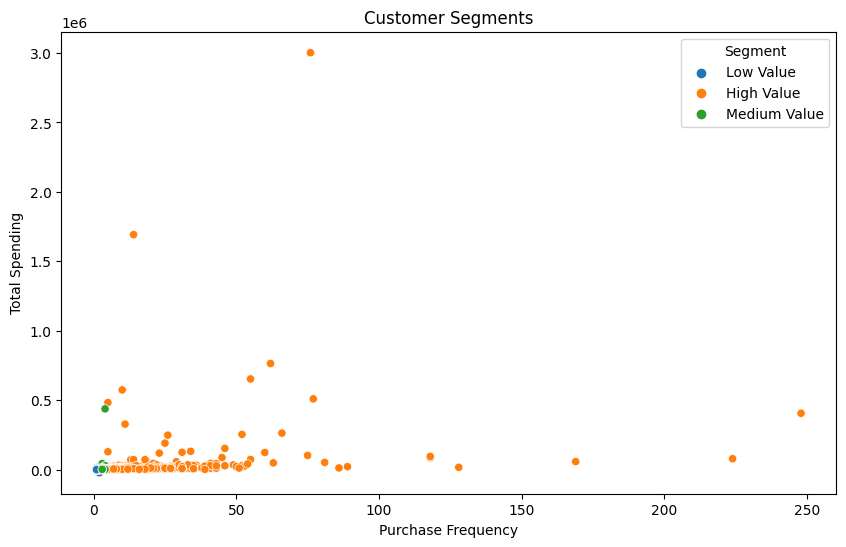

In [67]:
# Visualize the customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="InvoiceNo", y="TotalSales", hue="Segment", data=customer_segmentation
)
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending")
plt.title("Customer Segments")
plt.show()

It's evident that High-Value customers stand out by making the highest number of purchases and spending the greatest amount of money. Additionally, their purchases include outliers in terms of both Total Spending and Purchase Frequency.

Time-of-Day Analysis:

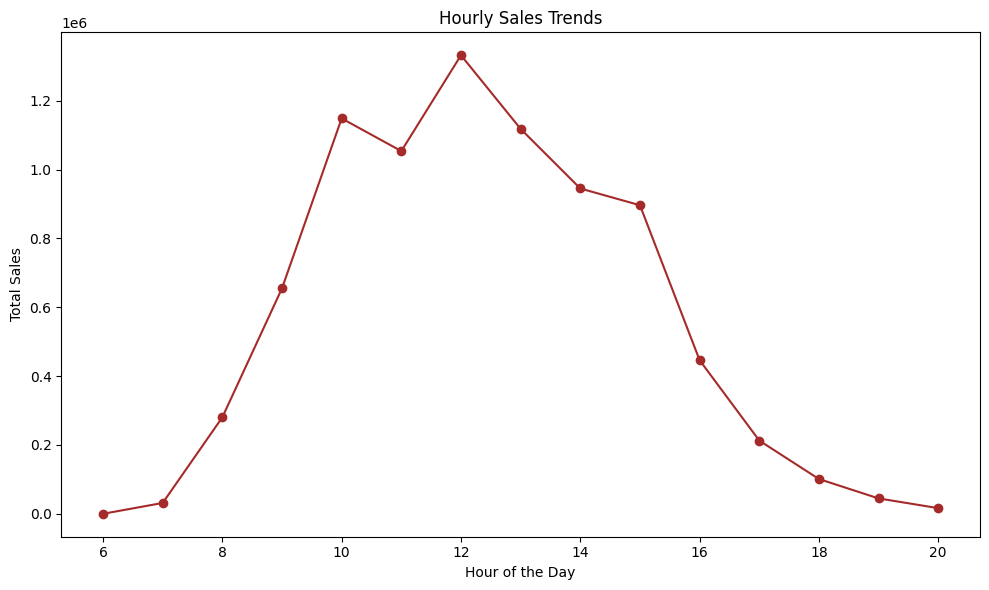

In [70]:
# Extract hour from InvoiceDate
df["Hour"] = df["InvoiceDate"].dt.hour

# Calculate TotalSales as the product of Quantity and UnitPrice
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]

# Sales by hour of the day
hourly_sales = df.groupby("Hour")["TotalSales"].sum()

# Plot hourly sales trends
plt.figure(figsize=(10, 6))
hourly_sales.plot(marker="o", color="brown")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.title("Hourly Sales Trends")
plt.tight_layout()
plt.show()


So it's clear that, from 10 to 1 PM, the sales are highest. So we can conclude that, most of the people shop during the lunch time. 

#### RFM Segmentation Analysis

RFM (Recency, Frequency, Monetary) helps categorize customers based on their behavior and value to the company. In this code, we calculate the recency of customers' last purchase, their purchase frequency, and their total monetary spending. These values are then combined into an RFM score, which is used to segment customers. <br />
**Recency** calculates the number of days between the most recent invoice date and the present date for each customer. <br />
**Frequency** calculates the number of unique invoice numbers for each customer, representing their transaction frequency. <br />
**Monetary** calculates the sum of total sales for each customer. <br />

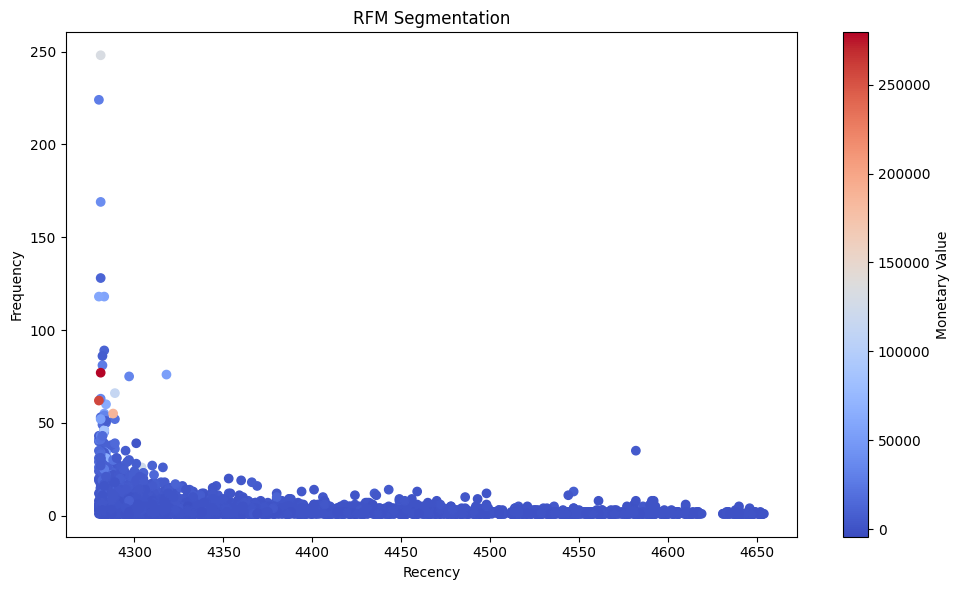

In [74]:
# Calculate the current date and time
PRESENT = datetime.datetime.now()

# Calculate Recency, Frequency, and Monetary values using groupby
recency = (
    df.groupby("CustomerID")["InvoiceDate"].max().apply(
        lambda x: (PRESENT - x).days)
)
frequency = df.groupby("CustomerID")["InvoiceNo"].nunique()
monetary = df.groupby("CustomerID")["TotalSales"].sum()

# Combine RFM values into a DataFrame
rfm_data = pd.DataFrame(
    {"Recency": recency, "Frequency": frequency, "Monetary": monetary}
)

# Calculate RFM Score and add it to the DataFrame
rfm_data["RFM_Score"] = (
    rfm_data["Recency"] + rfm_data["Frequency"] + rfm_data["Monetary"]
) / 3

# Plot RFM segmentation
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    rfm_data["Recency"], rfm_data["Frequency"], c=rfm_data["Monetary"], cmap="coolwarm"
)
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("RFM Segmentation")
plt.colorbar(scatter, label="Monetary Value")
plt.tight_layout()

plt.show()

In [79]:
rfm_data.head()

,Recency,Frequency,Monetary,RFM_Score,r_quartile
CustomerID,,,,,
12346.0,4605,2,0.00,1535.666667,4
12347.0,4282,7,4310.00,2866.333333,1
12348.0,4355,4,1797.24,2052.080000,3
12349.0,4299,1,1757.55,2019.183333,2
12350.0,4590,1,334.40,1641.800000,4


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Hour         401604 non-null  int32         
 9   TotalSales   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(4)
memory usage: 32.2+ MB


In [97]:
# Create Total Price column
# Calculate TotalSales as the product of Quantity and UnitPrice
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df["InvoiceDate"].min(), df["InvoiceDate"].max()


rfm = uk_data.groupby("CustomerID").agg(
    {
        "InvoiceDate": lambda date: (PRESENT - date.max()).days,
        "InvoiceNo": lambda num: len(num),
        "TotalPrice": lambda price: price.sum(),
    }
)

# Change the name of columns
rfm.columns = ["recency", "monetary", "frequency"]
rfm["recency"] = rfm["recency"].astype(int)

### Computing Quantile of RFM values
##### Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

##### qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.


In [100]:
rfm["r_quartile"] = pd.qcut(rfm["recency"], 4, ["1", "2", "3", "4"])
rfm["f_quartile"] = pd.qcut(rfm["frequency"], 4, ["4", "3", "2", "1"])
rfm["m_quartile"] = pd.qcut(rfm["monetary"], 4, ["4", "3", "2", "1"])

In [101]:
rfm.head()

,recency,monetary,frequency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,4605,2,0.00,4,4,4
12747.0,4282,103,4196.01,1,1,1
12748.0,4280,4459,28405.56,1,1,1
12749.0,4284,231,3868.20,1,1,1
12820.0,4283,59,942.34,1,2,2


### RFM Result Interpretation

Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the customers well group.

In [102]:
rfm["RFM_Score"] = (
    rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
)
rfm.head()

,recency,monetary,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,4605,2,0.00,4,4,4,444
12747.0,4282,103,4196.01,1,1,1,111
12748.0,4280,4459,28405.56,1,1,1,111
12749.0,4284,231,3868.20,1,1,1,111
12820.0,4283,59,942.34,1,2,2,122


 #### Filter out Top/Best cusotmers always showing 111. 

In [104]:
rfm[rfm["RFM_Score"] == "111"].sort_values("monetary", ascending=False).head()


,recency,monetary,frequency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
17841.0,4281,7812,39869.05,1,1,1,111
14096.0,4284,5128,57120.91,1,1,1,111
12748.0,4280,4459,28405.56,1,1,1,111
14606.0,4281,2759,11633.35,1,1,1,111
15311.0,4280,2478,59284.19,1,1,1,111
